In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/CNN/Imageclassification

/content/drive/MyDrive/CNN/Imageclassification


In [6]:
ls

checkpoint  my_checkpoint.data-00000-of-00001  my_model/
dataset/    my_checkpoint.index


In [7]:
import os
from PIL import Image
import numpy as np
import os
 

X = []
y = []

base_path='./dataset/'
source_path=base_path
for child in os.listdir(source_path):
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            X_i = Image.open(os.path.join(sub_path, data_file))
            X_i = np.array(X_i.resize((120,120))) / 255.0
            X.append(X_i)
            y.append(child)
print(X)
print(y)

[array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]]), array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
  

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), 
                                                    test_size=0.2, random_state=42)
#X_train=X_train.reshape([-1,120,120,1])
#X_test=X_test.reshape([-1,120,120,1])

In [35]:
from tensorflow.python.keras.backend import dropout
import tensorflow as tf
from tensorflow.python.keras import Model
from tensorflow.python.keras import Input,layers

import random

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

input = Input(shape=(120,120,3))
conv_1 = layers.Conv2D(32, (3, 3), activation='relu')(input)
maxpool_1 = layers.MaxPooling2D((2, 2))(conv_1)
conv_2 = layers.Conv2D(64, (3, 3), activation='relu')(maxpool_1)
maxpool_2 = layers.MaxPooling2D((2, 2))(conv_2)
conv_3 = layers.Conv2D(64, (3, 3), activation='relu')(maxpool_2)
flatten = layers.Flatten()(conv_3)
#dense_1 = layers.Dense(64, activation='relu')(flatten) 
y = layers.Dropout(rate=.2,noise_shape=None,seed=None)(flatten)
#dense_2 = layers.Dense(32, activation='relu')(y) 
output = layers.Dense(1, activation='sigmoid')(y) 
model = Model(inputs=input, outputs=output)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 120, 120, 3)]     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 43264)             0   

In [36]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train, y_train, epochs=20, batch_size=32)
testLoss, testAccuracy = model.evaluate(X_test, y_test)
print(testAccuracy)
model.save("my_fmodel")
model.save_weights('./my_fcheckpoint')

Epoch 1/20
2/2 [==============================] - 1s 34ms/step - loss: 0.6861 - accuracy: 0.3939
Epoch 2/20
2/2 [==============================] - 1s 37ms/step - loss: 2.2347 - accuracy: 0.5455
Epoch 3/20
2/2 [==============================] - 1s 33ms/step - loss: 0.7452 - accuracy: 0.5455
Epoch 4/20
2/2 [==============================] - 1s 45ms/step - loss: 0.5374 - accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 1s 33ms/step - loss: 0.5030 - accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 1s 35ms/step - loss: 0.4520 - accuracy: 0.8182
Epoch 7/20
2/2 [==============================] - 1s 33ms/step - loss: 0.4293 - accuracy: 0.6364
Epoch 8/20
2/2 [==============================] - 1s 34ms/step - loss: 0.2494 - accuracy: 1.0000
Epoch 9/20
2/2 [==============================] - 1s 35ms/step - loss: 0.1871 - accuracy: 1.0000
Epoch 10/20
2/2 [==============================] - 1s 32ms/step - loss: 0.0798 - accuracy: 1.0000
Epoch 11/20
2/2 [============

In [37]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [38]:
print(y_pred)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


print(y_pred)

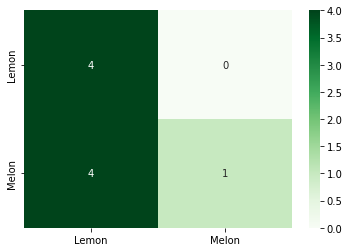

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap='Greens', annot=True, xticklabels = ["Lemon", "Melon"],yticklabels = ["Lemon", "Melon"])


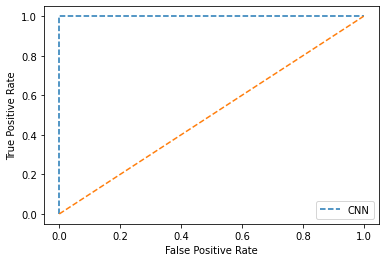

In [40]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

pred_prob = model.predict(X_test)
pr1, tpr1, thresh1 = roc_curve(y_test, pred_prob, pos_label=1)


random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.plot(pr1, tpr1, linestyle='--', label='CNN')
plt.plot(p_fpr, p_tpr, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/